In [2]:
import pandas as pd
import numpy as np

def getTagsDict(df):
    tag_dict = {}
    
    for index, row in df.iterrows():
        for tag in row['hashtags']:
            if tag in tag_dict:
                tag_dict[tag] = tag_dict[tag] + 1
            else:
                tag_dict[tag] = 1
                
    sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])
    return sort_dict

filename = 'allseason_20k_rawdata.json'
allseason = pd.read_json(filename)
base_df = allseason[['id','username','hashtags']]

base_df.index = base_df['id']
base_df = base_df.drop(columns=['username'])
base_df = base_df.drop(columns=['id'])

fashion_df = base_df[base_df.astype(str)['hashtags'] != '[]']

tag_df = list(fashion_df['hashtags'])
for i in range(len(tag_df)):
    tag_df[i] = list(set(tag_df[i]))
    
fashion_df['hashtags'] = tag_df

fashion_dict = getTagsDict(fashion_df)
fashion_dict_top = fashion_dict[-1000:]
fashion_top = []
for i in fashion_dict_top:
    fashion_top.append(i[0])

post_id = fashion_df.index.values
    
def get_DataFrame_for_affinity(df,taglist):
    
    result_df = pd.DataFrame(
        0, index = np.arange(0,len(df)),columns=taglist)    
    
    for i in range(len(df)):
        list_of_row = list(df.iloc[i])[0]
        
        for tag in list_of_row:
            if tag in taglist:
                result_df[tag][i] = 1
        
    return result_df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
import time
start_time = time.time()

before_corr = get_DataFrame_for_affinity(fashion_df,fashion_top)

print("--- %s seconds ---" % (time.time() - start_time))

--- 68.11322569847107 seconds ---


In [4]:
before_corr.head()

,newin,izmir,beachvibes,1950sfashion,australiandesigner,home,summerwear,hijabstyle,natural,suit,...,fashionista,instafashion,fashionblogger,ootd,style,fallfashion,summerfashion,springfashion,winterfashion,fashion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1


In [5]:
before_corr['post_id'] = pd.DataFrame(post_id)

In [6]:
before_corr.head()

,newin,izmir,beachvibes,1950sfashion,australiandesigner,home,summerwear,hijabstyle,natural,suit,...,instafashion,fashionblogger,ootd,style,fallfashion,summerfashion,springfashion,winterfashion,fashion,post_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,BtOm-dkHn5v
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,BtQp-IfHkzq
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,BtRdH3UBQ6i
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,BtOpNQpApMI
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,BtRHyjZAem6


In [149]:
test1 = ['springcollection', 'boys', 'kidsclothes', 'stylishkids', 'unisexclothing', 'fashionkids', 'kids', 'girls', 'summerclothes', 'momblogger', 'cutekids']

test2 = ['женскаяодежда', 'rochiideseara', 'genti', 'womancollection', 'marimimari', 'incaltamintechisinau', 'pantofi', 'accesorii', 'chisinau', 'winter2019collection', 'cizme', 'incaltamintelacomanda', 'rochiiieftine', 'newcollection2019', 'обувьназаказ', 'rochii', 'moldova', 'md', 'localsmd', 'costumesport', 'incaltamintemoldova', 'colectiadetoamna', 'haine', 'mdfashion', 'женскаяодеждабольшихразмеров', 'costume', 'incaltamintedinpiele']

test3 = ['ltksalealert', 'ltkunder100', 'ltkshoecrush', 'liketkit', 'ltkunder50', 'ltkstyletip']

test4 = ['ad', 'viral', 'sunnyday', 'naturalhair', 'mondaymotivation', 'naturalista', 'summerdress', 'polynesian', 'hair', 'polynesiankids', 'springdress', 'garciajeans', 'bunstyle', 'springoutfit', 'naturallife', 'stellacove', 'greendress', 'bambooearrings']

test5 = ['tigerzindahai', 'salmanlove', 'salmankhan', 'romantic', 'bangalore', 'pictureoftheday', 'turkishfashion', 'womenstracksuit', 'mumbai', 'passion', 'movies', 'beinghuman', 'handsome', 'movielovers', 'bollywood', 'hunk']

test6 = ['gift', 'westernfashion', 'likeforfollow', 'couplegoals', 'mumbaifashion', 'indianfashionblogger', 'followforfollowback']

test7 = ['vintagegirl', 'pinupgirl', 'vintageclothing', 'pinupstyle', 'retrostyle', '1950sfashion', 'truevintage', 'vintagestyle', 'pinup', 'vintagefashion', 'dasterbali']

test8 = ['wanted', 'ootl', 'promoterswanted', 'comfy', 'deal', 'ambassador', 'instablogger', 'ambassadorsearch', 'ambassadorswanted', 'brandambassador', 'modelswanted', 'influencerswanted']

test9 = ['instawinter', 'winterbreak', 'winters', 'coldday', 'winter2019', 'wintertime', 'wintersoldier', 'instagramanet', 'holidays', 'winter2018', 'snowing', 'colddays', 'winteriscoming', 'winterfun', 'winterpark', 'wintersun', 'winterishere', 'instatag', 'blizzard']

test10 = ['swim', 'resortwear', 'tan', 'tankini', 'bikiniseason', 'bikinifashion', 'bikinis', 'swimming', 'croptop', 'swimwearfashion', 'beachstyle', 'monokini', 'shorts', 'bikinilovers', 'beachfashion', 'beachbum']

test11 = ['model', 'boho', 'trend', 'bohemian', 'bohochic', 'blogger', 'bohofashion', 'linen', 'bohostyle', 'afterpay', 'pinterest', 'editorial', 'influencer', 'cotton', 'freeshipping', 'stylist']

test12 = ['summernights', 'summerishere', 'summernight', 'summerlovin', 'summerweather', 'summerfeeling', 'summerfun', 'summerjam', 'summernails', 'summerday', 'summers', 'summerholiday', 'sun']

0    13
dtype: int64
17644


<function matplotlib.pyplot.show(*args, **kw)>

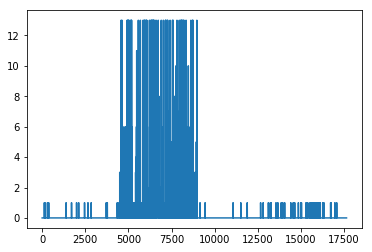

In [150]:
test_onehot = pd.DataFrame(before_corr.loc[0])
test_onehot = test_onehot.T
for tag in fashion_top:
    test_onehot[tag] = 0

for tag in test12:
    test_onehot[tag] = 1

# test_onehot = test_onehot.drop(['post_id'], axis=1)
print(test_onehot.sum(axis=1))

# before_corr = before_corr.drop(columns=['post_id'])

resultlist = []
for index, row in before_corr.iterrows():
    logical_and = row & test_onehot
    resultlist.append(logical_and)
    
print(len(resultlist))
sumlist = []
for row in resultlist:
    sumvalue = row.sum(axis = 1)
    sumlist.append(sumvalue)
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sumlist)
plt.show

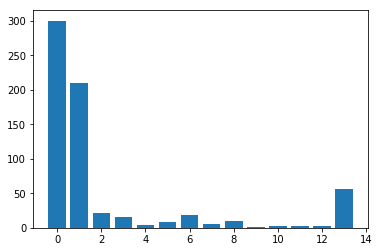

{0: 300, 1: 210, 13: 56, 2: 22, 6: 18, 3: 15, 8: 10, 5: 9, 7: 5, 4: 4, 12: 2, 11: 2, 10: 2, 9: 1}
0     17288
1       210
13       56
2        22
6        18
3        15
8        10
5         9
7         5
4         4
12        2
11        2
10        2
9         1
Name: 0, dtype: int64


In [151]:
freq = pd.DataFrame(resultpd[0].value_counts())
hist = {}
for index, value in freq.iterrows():
    if int(value) > 300:
        hist[index] = 300
    else:
        hist[index] = int(value)
plt.bar(hist.keys(), hist.values())
plt.show()
print(hist)
print(resultpd[0].value_counts())

In [152]:
resultpd = pd.DataFrame(sumlist, post_id)
print(resultpd.loc[resultpd[0] == 13])

              0
Bs54tiXBb2E  13
Bs6G4XDl47q  13
Bs9WllqBhTT  13
Bs5mZGNBjGG  13
BmZAiN3AfKE  13
BtJSYKJhJ3A  13
Bs57omPhTLN  13
BtGex4MBAW4  13
Bs6kpveBJ-h  13
BtKbgneha28  13
Bs5mRKhhGAp  13
Bs3iYOGB4xK  13
BtFVXTKBc64  13
Bs8eXtgBllI  13
BtFZxN_hQdp  13
Bs6kjlNhSIX  13
BtEsnOChgfF  13
Bs54itvBKmz  13
BtFY558h9hG  13
BtEMyr_hoiE  13
Bs57ic0B1x8  13
BtG0BgsB7ep  13
Bs57gd9BJKH  13
Bs9Vm0oBimB  13
BtEshMbBSB7  13
BtRLLylAeCM  13
Bld2SqpAO3b  13
BtECA3Sg8BL  13
Bs57X6jBXs4  13
BtKuZrShAmp  13
BtKakiyBuEP  13
BtFVMtbBf-d  13
BtP2YDwB7R1  13
Bs8iRRdnc7P  13
Bs8eQUEB2pB  13
BtFY4TiBnZ4  13
BtG8so1BnTt  13
BtG0vrEB2uq  13
Bs4SUutBetM  13
BtG0qbxBxAA  13
BtG0me1Biox  13
BtG8qMIhneO  13
BtEsdkyhcNZ  13
BtCqMlFBR-T  13
BtKaoAXBrmV  13
BtEsjDkBLZM  13
BtAaFYIFcuq  13
Bs3sPHuhJBI  13
BtKLhZ7Bstb  13
BtP2VRSBBpQ  13
BtP1qqShkVV  13
BtGeuSLhW2H  13
Bs54l3iBNYD  13
Bs3ssiLB3el  13
BtG0gmFB1fo  13
BtEIEeDAttz  13
